In [49]:
import open3d as o3d
import numpy as np
import torch

saved_dict = np.load('save_dict_top10.npz', allow_pickle=True)['d'].item()
idx = 9
query_color = np.array([1, 0, 0])
filter_color = np.array([0, 1, 0])
print(saved_dict['scene_ids'][idx])
print(saved_dict['raw_lang'][idx])
scene_data = np.load(f"D:/Data/raw_scannet_data/{saved_dict['scene_ids'][idx]}_aligned_vert.npy")
scene_points = scene_data[:, 0:3]
scene_colors = scene_data[:, 3:6] / 255
query_points = saved_dict['query_points_xyz'][idx]
query_colors = np.ones_like(query_points) * query_color.reshape((1, 3))
filter_points = saved_dict['filter_xyz'][idx]
filter_colors = np.ones_like(filter_points) * filter_color

pts = np.concatenate([filter_points, query_points, scene_points], axis=0)
cls = np.concatenate([filter_colors, query_colors, scene_colors], axis=0)

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(pts)
pcd.colors = o3d.utility.Vector3dVector(cls)
o3d.visualization.draw_geometries([pcd])


scene0011_00
there is a large painting on the wall . there is a chair at the end of the table close to the painting , we are not talking about that share . we are talking about the other chair that is close to the trash can to the right side of the painting . it is brown and wooden .


In [41]:
import open3d as o3d
import numpy as np
import torch

saved_dict = np.load('gt_image_ref_points.npz', allow_pickle=True)['data'].item()['data']
idx = 6
ref_color = np.array([1, 0, 0])
ref_img_color = np.array([0, 1, 0])
print(saved_dict[idx]['scene_id'])
print(saved_dict[idx]['frame_name'])
print(saved_dict[idx]['raw_lang'])
scene_data = np.load(f"D:/Data/raw_scannet_data/{saved_dict[idx]['scene_id']}_vert.npy")
scene_points = scene_data[:, 0:3]
scene_colors = scene_data[:, 3:6] / 255
ref_points = saved_dict[idx]['ref_points']
ref_colors = np.ones_like(ref_points) * ref_color.reshape((1, 3))
ref_img_points = saved_dict[idx]['ref_img_points']
ref_img_colors = np.ones_like(ref_img_points) * ref_img_color

pts = np.concatenate([ref_img_points, ref_points, scene_points], axis=0)
cls = np.concatenate([ref_img_colors, ref_colors, scene_colors], axis=0)

pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(pts)
pcd.colors = o3d.utility.Vector3dVector(cls)
o3d.visualization.draw_geometries([pcd])


scene0011_00
1180.jpg
this is the long skinny table under the painting on the wall . the painting upon the wall is gray . the wall the painting is on its opposite the doors .


In [3]:
import numpy as np

saved_dict = np.load('gt_image_ref_points.npz', allow_pickle=True)['data'].item()
print(saved_dict['data'])


[{'scene_id': 'scene0011_00', 'object_id': tensor(5), 'raw_lang': 'there is a dark brown wooden and leather chair . placed in the table of the kitchen .', 'ref_points': array([[4.0440288 , 4.564712  , 0.9024542 ],
       [4.1460605 , 4.8901997 , 0.25706324],
       [4.032932  , 4.848862  , 1.0489453 ],
       ...,
       [4.148787  , 4.574538  , 0.3210413 ],
       [4.158037  , 4.985333  , 0.3271569 ],
       [4.0542846 , 4.76812   , 0.91095555]], dtype=float32), 'ref_img_points': array([[4.0440288 , 4.564712  , 0.9024542 ],
       [4.1460605 , 4.8901997 , 0.25706324],
       [4.032932  , 4.848862  , 1.0489453 ],
       ...,
       [4.148787  , 4.574538  , 0.3210413 ],
       [4.158037  , 4.985333  , 0.3271569 ],
       [4.0542846 , 4.76812   , 0.91095555]], dtype=float32)}, {'scene_id': 'scene0011_00', 'object_id': tensor(13), 'raw_lang': 'there is a brown wooden chair . placed beside other chairs in the middle of the kitchen .', 'ref_points': array([[5.472576  , 4.8568892 , 0.5738019

In [5]:
import numpy as np
saved_dict = np.load('save_new_dict.npz', allow_pickle=True)['d'].item()
# filter_num = saved_dict['filter_num']
print(saved_dict.keys())
print(saved_dict['filter_ref_mask'].reshape(1844, -1).shape)
print(saved_dict['sample_ref_mask'].reshape(1844, -1).shape)
print(saved_dict['filter_num'].shape)
print(saved_dict['query_points_xyz'].shape)

dict_keys(['query_points_xyz', 'filter_xyz', 'filter_num', 'filter_ref_mask', 'scene_ids', 'raw_lang', 'sample_ref_mask'])
torch.Size([1844, 512])
torch.Size([1844, 512])
torch.Size([1844])
torch.Size([1844, 512, 3])


mean filter ref num: 25.25433921813965
mean sample ref num: 31.915943145751953
mean filter points num: 156.5927276611328


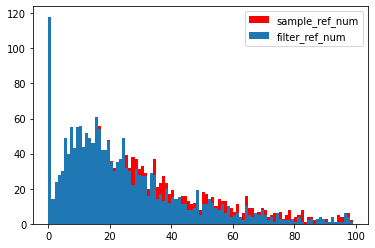

In [15]:
print("mean filter ref num:", saved_dict['filter_ref_mask'].reshape(1844, -1).sum(axis=1).float().mean().item())
print("mean sample ref num:", saved_dict['sample_ref_mask'].reshape(1844, -1).sum(axis=1).float().mean().item())
print("mean filter points num:", saved_dict['filter_num'].float().mean().item())

filter_ref_num = saved_dict['filter_ref_mask'].reshape(1844, -1).sum(axis=1)
sample_ref_num = saved_dict['sample_ref_mask'].reshape(1844, -1).sum(axis=1)
from matplotlib import pyplot as plt
plt.hist(sample_ref_num, bins=np.arange(0, 100, 1), color='r')
plt.hist(filter_ref_num, bins=np.arange(0, 100, 1))
plt.legend(['sample_ref_num', 'filter_ref_num'])
plt.show()

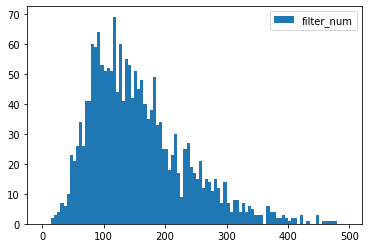

In [18]:
plt.hist(saved_dict['filter_num'], bins=np.arange(0, 500, 5))
plt.legend(['filter_num'])
plt.show()

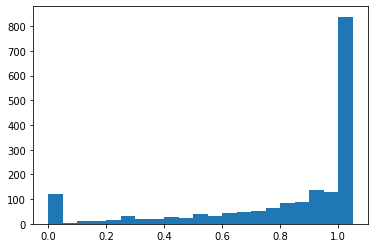

In [24]:
plt.hist(filter_ref_num/sample_ref_num, bins=np.arange(0, 1.1, 0.05))
plt.show()

In [29]:
((((filter_ref_num/sample_ref_num) >= 0.8).sum()/1844).item())

0.6919739842414856

In [51]:
import csv

nyuid2name = {}
with open(r'D:\Projects\3dsps-vis\scannetv2-labels-combined.tsv') as f:
    reader = csv.DictReader(f, delimiter='\t')
    for row in reader:
        if int(row['nyu40id']) not in list(nyuid2name.keys()):
            nyuid2name[int(row['nyu40id'])] = row['nyu40class']
            
print(nyuid2name)

{1: 'wall', 5: 'chair', 23: 'books', 2: 'floor', 8: 'door', 40: 'otherprop', 9: 'window', 7: 'table', 39: 'otherfurniture', 18: 'pillow', 11: 'picture', 22: 'ceiling', 29: 'box', 3: 'cabinet', 14: 'desk', 15: 'shelves', 27: 'towel', 6: 'sofa', 34: 'sink', 35: 'lamp', 4: 'bed', 10: 'bookshelf', 19: 'mirror', 16: 'curtain', 30: 'whiteboard', 33: 'toilet', 37: 'bag', 21: 'clothes', 32: 'night stand', 25: 'television', 17: 'dresser', 24: 'refrigerator', 28: 'shower curtain', 36: 'bathtub', 12: 'counter', 38: 'otherstructure', 20: 'floor mat', 26: 'paper', 31: 'person', 13: 'blinds'}
